In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Roman Urdu DataSet.csv')
df.dropna()
df.columns =['comments', 'Result','NaN']

# Making all the comments lower case
df['comments'] = df['comments'].str.lower()
df.head()

,comments,Result,NaN
0,sahi bt h,Positive,NaN
1,"kya bt hai,",Positive,NaN
2,wah je wah,Positive,NaN
3,are wha kaya bat hai,Positive,NaN
4,wah kya baat likhi,Positive,NaN


In [3]:
#Deleting the third column
df.drop('NaN', inplace=True, axis=1)
df.head()

,comments,Result
0,sahi bt h,Positive
1,"kya bt hai,",Positive
2,wah je wah,Positive
3,are wha kaya bat hai,Positive
4,wah kya baat likhi,Positive


In [4]:
#Removing null values in comment
df['comments'].isnull().sum()
df = df.dropna(axis=0, inplace=False)

In [5]:
df['comments'].isnull().sum()

0

In [6]:
df['comments'].value_counts().sum()

20227

In [7]:
df["Result"].unique() #checking unique values in the dataset

array(['Positive', 'Neutral', 'Negative', 'Neative'], dtype=object)

In [8]:
## Correcting the spelling of one misspelled label
df['Result'] = df['Result'].str.replace('Neative', 'Negative')

<ipython-input-8-5215988e0f67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Result'] = df['Result'].str.replace('Neative', 'Negative')


In [9]:
df["Result"].unique() #checking unique values in the dataset

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [10]:
#Counting all the values according to the sentiments
print("Positive --> "+ str(len(df[df['Result']=='Positive'])))
print("Negative --> "+ str(len(df[df['Result']=='Negative'])))
print("Neutral --> "+ str(len(df[df['Result']=='Neutral'])))

Positive --> 6012
Negative --> 5287
Neutral --> 8928


In [11]:
df.shape

(20227, 2)

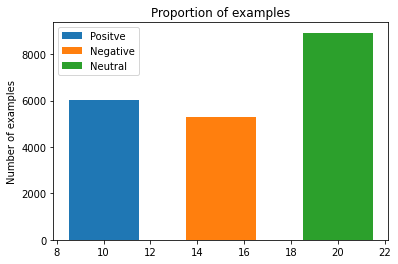

In [12]:
#Bar graph for the classes
import matplotlib.pyplot as plt

Pos = df[df['Result'] == 'Positive'].shape[0]
Neg = df[df['Result'] == 'Negative'].shape[0]
Neu = df[df['Result'] == 'Neutral'].shape[0]

plt.bar(10,Pos,3, label="Positve")
plt.bar(15,Neg,3, label="Negative")
plt.bar(20,Neu,3, label="Neutral")
plt.legend()
plt.ylabel('Number of examples')
plt.title('Proportion of examples')
plt.show()

In [13]:
#punctuation
df['without_punctuation']=df['comments'].str.replace(r'[^\w\s]+', '')
df.head(5)

<ipython-input-13-ccf989f86b79>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['without_punctuation']=df['comments'].str.replace(r'[^\w\s]+', '')


,comments,Result,without_punctuation
0,sahi bt h,Positive,sahi bt h
1,"kya bt hai,",Positive,kya bt hai
2,wah je wah,Positive,wah je wah
3,are wha kaya bat hai,Positive,are wha kaya bat hai
4,wah kya baat likhi,Positive,wah kya baat likhi


In [14]:
df.drop('comments', inplace=True, axis=1)
df.head()

,Result,without_punctuation
0,Positive,sahi bt h
1,Positive,kya bt hai
2,Positive,wah je wah
3,Positive,are wha kaya bat hai
4,Positive,wah kya baat likhi


In [15]:
#Changing column names 
df.rename(columns = {'without_punctuation':'comments', 'Result':'Sentiments'}, inplace = True)
df.head()

,Sentiments,comments
0,Positive,sahi bt h
1,Positive,kya bt hai
2,Positive,wah je wah
3,Positive,are wha kaya bat hai
4,Positive,wah kya baat likhi


In [16]:
import nltk
import re as re
nltk.download('punkt')
from nltk.tokenize import word_tokenize
df['tokenized_comments'] = df.apply(lambda row: nltk.word_tokenize(row['comments']), axis=1)
df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Sentiments,comments,tokenized_comments
0,Positive,sahi bt h,"[sahi, bt, h]"
1,Positive,kya bt hai,"[kya, bt, hai]"
2,Positive,wah je wah,"[wah, je, wah]"
3,Positive,are wha kaya bat hai,"[are, wha, kaya, bat, hai]"
4,Positive,wah kya baat likhi,"[wah, kya, baat, likhi]"


In [17]:
# Only keeping the tokeized_comments column with sentiments and removing comments
df.drop('comments', inplace=True, axis=1)
df.head()

,Sentiments,tokenized_comments
0,Positive,"[sahi, bt, h]"
1,Positive,"[kya, bt, hai]"
2,Positive,"[wah, je, wah]"
3,Positive,"[are, wha, kaya, bat, hai]"
4,Positive,"[wah, kya, baat, likhi]"


In [18]:
# 2916 more instances are needed for making Positive equal to Neutral
# 3,641 more instance needed for making Negative  equal to Neutral

# Data Augmentation using random shuffling, one of the most common techniques 
8928
import random
# This function perform data augmentation using tokenized word swapping
def data_augmentation(dataset, percent):

  comments = []
  sentiments = []
  # How much percent data should be augmented 
  new_df = dataset.sample(frac=percent)
  #df.apply(lambda x: random.shuffle(x['tokenized_comments']), axis=1)
  copy_of_new_df = new_df
  for ind in new_df.index:
    comments.append(new_df['tokenized_comments'][ind])
    sentiments.append(new_df['Sentiments'][ind])
  
  for itr in range(len(comments)):
    random.shuffle(comments[itr])

  
  new_df = pd.DataFrame(list(zip(sentiments, comments)),
               columns =['Sentiments', 'tokenized_comments'])

  return new_df

df_pos = df[df['Sentiments'] == 'Positive']
df_neg = df[df['Sentiments'] == 'Negative']
df_pos.head(5)
df_pos.shape

(6012, 2)

In [19]:
pos_augmented_df = data_augmentation(df_pos, 0.4850)
neg_augmented_df = data_augmentation(df_neg, 0.6886)
pos_augmented_df.head(5)

,Sentiments,tokenized_comments
0,Positive,"[hide, read, h, more, bag, bhae, acha]"
1,Positive,"[bhoot, achayyy]"
2,Positive,"[krengy, ptq, ya, khud, set, hongy, set, ab, ni]"
3,Positive,"[squash, aate, saal, the, waqat, khilari, tha,..."
4,Positive,"[1993, wo, 1981, rahin, se, tak, se, 1987, pol..."


In [20]:
pos_augmented_df.shape

(2916, 2)

In [21]:
neg_augmented_df.shape

(3641, 2)

In [22]:
df = pd.concat([df, pos_augmented_df, neg_augmented_df], axis=0)
df.shape

(26784, 2)

In [23]:
#Counting all the values according to the sentiments
print("Positive --> "+ str(len(df[df['Sentiments']=='Positive'])))
print("Negative --> "+ str(len(df[df['Sentiments']=='Negative'])))
print("Neutral --> "+ str(len(df[df['Sentiments']=='Neutral'])))

Positive --> 8928
Negative --> 8928
Neutral --> 8928


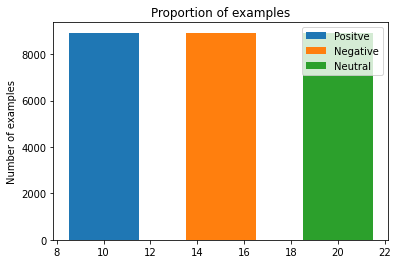

In [24]:

Pos = df[df['Sentiments'] == 'Positive'].shape[0]
Neg = df[df['Sentiments'] == 'Negative'].shape[0]
Neu = df[df['Sentiments'] == 'Neutral'].shape[0]

plt.bar(10,Pos,3, label="Positve")
plt.bar(15,Neg,3, label="Negative")
plt.bar(20,Neu,3, label="Neutral")
plt.legend()
plt.ylabel('Number of examples')
plt.title('Proportion of examples')
plt.show()

In [25]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

In [26]:
df['tokenized_comments'] = df['tokenized_comments'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

In [27]:
X=df["tokenized_comments"]
y=df["Sentiments"]

In [28]:
df2 = pd.DataFrame().assign(tweet=df["tokenized_comments"], output=df["Sentiments"])

df2.head()

train, test = train_test_split(df2, test_size = 0.2, stratify = df2['output'], random_state=21)

# get the shape of train and test split.
train.shape, test.shape

((21427, 2), (5357, 2))

In [29]:
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split


In [30]:
stopwords=['ai', 'ayi', 'hy', 'hai', 'main', 'ki', 'tha', 'koi', 'ko', 'sy', 'woh', 'bhi', 'aur', 'wo', 'yeh', 'rha', 'hota', 'ho', 'ga', 'ka', 'le', 'lye', 'kr', 'kar', 'lye', 'liye', 'hotay', 'waisay', 'gya', 'gaya', 'kch', 'ab', 'thy', 'thay', 'houn', 'hain', 'han', 'to', 'is', 'hi', 'jo', 'kya', 'thi', 'se', 'pe', 'phr', 'wala', 'waisay', 'us', 'na', 'ny', 'hun', 'rha', 'raha', 'ja', 'rahay', 'abi', 'uski', 'ne', 'haan', 'acha', 'nai', 'sent', 'photo', 'you', 'kafi', 'gai', 'rhy', 'kuch', 'jata', 'aye', 'ya', 'dono', 'hoa', 'aese', 'de', 'wohi', 'jati', 'jb', 'krta', 'lg', 'rahi', 'hui', 'karna', 'krna', 'gi', 'hova', 'yehi', 'jana', 'jye', 'chal', 'mil', 'tu', 'hum', 'par', 'hay', 'kis', 'sb', 'gy', 'dain', 'krny', 'tou']

stop_extended =  stopwords

In [31]:
tfidf_vectorizer = TfidfVectorizer(lowercase= True, max_features=1000, stop_words=stop_extended)

# fit the object with the training data tweets
tfidf_vectorizer.fit(train.tweet)

TfidfVectorizer(max_features=1000,
                stop_words=['ai', 'ayi', 'hy', 'hai', 'main', 'ki', 'tha',
                            'koi', 'ko', 'sy', 'woh', 'bhi', 'aur', 'wo', 'yeh',
                            'rha', 'hota', 'ho', 'ga', 'ka', 'le', 'lye', 'kr',
                            'kar', 'lye', 'liye', 'hotay', 'waisay', 'gya',
                            'gaya', ...])

In [32]:
train_idf = tfidf_vectorizer.transform(train.tweet)
test_idf  = tfidf_vectorizer.transform(test.tweet)

In [33]:
from sklearn.svm import SVC
clf=SVC()
clf.fit(train_idf, train.output)

SVC()

In [34]:
predict_train1 = clf.predict(train_idf)

predict_test1 =  clf.predict(test_idf)

In [35]:
from nltk.metrics.scores import accuracy
print (accuracy(test.output,predict_test1))

0.6865783087549001


In [36]:
pipeline = Pipeline(steps= [('tfidf', TfidfVectorizer(lowercase=True,
                                                      max_features=1000,
                                                      stop_words= stop_extended)),
                            ('model', LogisticRegression())])

# fit the pipeline model with the training data                            
pipeline.fit(train.tweet, train.output)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=1000,
                                 stop_words=['ai', 'ayi', 'hy', 'hai', 'main',
                                             'ki', 'tha', 'koi', 'ko', 'sy',
                                             'woh', 'bhi', 'aur', 'wo', 'yeh',
                                             'rha', 'hota', 'ho', 'ga', 'ka',
                                             'le', 'lye', 'kr', 'kar', 'lye',
                                             'liye', 'hotay', 'waisay', 'gya',
                                             'gaya', ...])),
                ('model', LogisticRegression())])

In [37]:
text = ["oppo nahi lena"]

# predict the label using the pipeline
pipeline.predict(text)

array(['Negative'], dtype=object)

In [38]:
from joblib import dump

# dump the pipeline model
dump(pipeline, filename="text_classification.joblib")

['text_classification.joblib']

In [40]:
import pandas as pd
from joblib import load
text = ["oppo bohot acha ha"]
pipeline = load("text_classification.joblib")
pipeline.predict(text)

array(['Positive'], dtype=object)